**Group Mini-project - ML Project of the Orchard Hotel**

# Setup

This project requires Python 3.7 or above, Scikit-Learn ≥ 1.0.1, and TensorFlow ≥ 2.8:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Import Libraries and Load the Dataset

In [ ]:
# Import necessary libraries
import numpy as np      # For numerical operations
import pandas as pd     # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns

# Load the Orchard dataset into a Pandas DataFrame
orchard = pd.read_csv("/content/Orchard_dataset.csv")

Define the default font sizes to make the figures prettier:

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Data Structure Exploration

In [ ]:
# Display the top few rows of the dataset
orchard.head()

,hotel,is_cancelled,lead_time,av_daily_rev,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_cancelled,room_type,booking_changes,deposit_type,require_pickup
0,RS,0,342,0,2017,July,27,1,0,0,2,0.0,0,0,0,0,C,3,No Deposit,0
1,RS,0,737,0,2017,July,27,1,0,0,2,0.0,0,0,0,0,C,4,No Deposit,0
2,RS,0,7,469,2017,July,27,1,0,1,1,0.0,0,0,0,0,A,0,No Deposit,0
3,RS,0,13,469,2017,July,27,1,0,1,1,0.0,0,0,0,0,A,0,No Deposit,0
4,RS,0,14,613,2017,July,27,1,0,2,2,0.0,0,0,0,0,A,0,No Deposit,0


In [ ]:
orchard.shape

(119390, 20)

The Orchard dataset has 119,390 records (rows) and 20 features (columns).

In [ ]:
# Get a summary description of the data structure
orchard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   hotel                            119390 non-null  object 
 1   is_cancelled                     119390 non-null  int64  
 2   lead_time                        119390 non-null  int64  
 3   av_daily_rev                     119390 non-null  int64  
 4   arrival_date_year                119390 non-null  int64  
 5   arrival_date_month               119390 non-null  object 
 6   arrival_date_week_number         119390 non-null  int64  
 7   arrival_date_day_of_month        119390 non-null  int64  
 8   stays_in_weekend_nights          119390 non-null  int64  
 9   stays_in_week_nights             119390 non-null  int64  
 10  adults                           119390 non-null  int64  
 11  children                         119386 non-null  float64
 12  ba

The dataset has 4 character variables, namely "hotel", "arrival_date_month", "room_type", and "deposit_type". The remaining 16 variables are numeric. Only the "children" variable has missing values.

## Categorical Attributes

In [ ]:
# Set the "hotel" variable as the index column
orchard = orchard.set_index("hotel")

Take a quick look at the categorical attributes:

In [ ]:
orchard["arrival_date_month"].value_counts()

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

抵达月份大部分是气温暖和的5-10月，暑假、五一、十一小长假，可以联系中国节假日，中国游客是东南亚旅游的主力军。后面在可视化中更直观地表现

In [ ]:
orchard["room_type"].value_counts()

room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

由十个大写字母表示的房间类型，A和D最受欢迎

In [ ]:
orchard["deposit_type"].value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

无订金，不可退款，可退款三种，无订金预定最多

## Numerical Attributes

In [ ]:
# Show the summary statistics of other numerical attributes
orchard.describe()

,is_cancelled,lead_time,av_daily_rev,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_cancelled,booking_changes,require_pickup
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,636.612891,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,0.062518
std,0.482918,106.863097,315.852781,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,0.245291
min,0.000000,0.000000,-40.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,433.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,591.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,788.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,737.000000,33750.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,8.000000


In [ ]:
# Check that the target is indeed 0 or 1
orchard["is_cancelled"].value_counts()

is_cancelled
0    75166
1    44224
Name: count, dtype: int64

In [ ]:
orchard["arrival_date_year"].value_counts()

arrival_date_year
2018    56707
2019    40687
2017    21996
Name: count, dtype: int64

In [ ]:
orchard["is_repeated_guest"].value_counts()

is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64

# Data Visualization (EDA)

## Distribution of the Label Variable

In [ ]:
# Overall proportion
values = orchard['is_cancelled'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) * 100

print('percentage of not cancelled:' ,percentage_0)
print('percentage of cancelled:' ,percentage_1)

percentage of not cancelled: 62.958371722924866
percentage of cancelled: 37.041628277075134


Plot cancellation rates for each hotel:

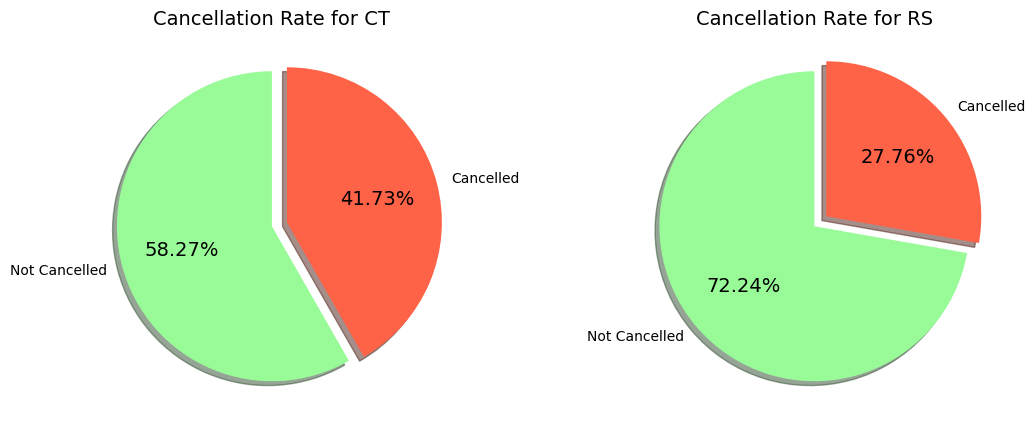

In [ ]:
# Group by the 'hotel' variable and count the number of 'is_cancelled' values for each category
grouped = orchard.groupby('hotel')['is_cancelled'].value_counts()

# Create a chart with two subgraphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Draw a pie chart for the 'CT' category
ax1.pie(grouped.loc['CT'],
        labels=['Not Cancelled', 'Cancelled'],
        autopct='%0.2f%%', startangle=90,
        colors=['palegreen', 'tomato'],
        explode=(0, 0.1), shadow=True)
ax1.set_title('Cancellation Rate for CT')

# Draw a pie chart for the 'RS' category
ax2.pie(grouped.loc['RS'],
        labels=['Not Cancelled', 'Cancelled'],
        autopct='%0.2f%%', startangle=90,
         colors=['palegreen', 'tomato'],
        explode=(0, 0.1), shadow=True)
ax2.set_title('Cancellation Rate for RS')

# Adjust the spacing between subgraphs
plt.subplots_adjust(wspace=0.4)

# Show the charts
plt.show()

不平衡问题

## Histograms

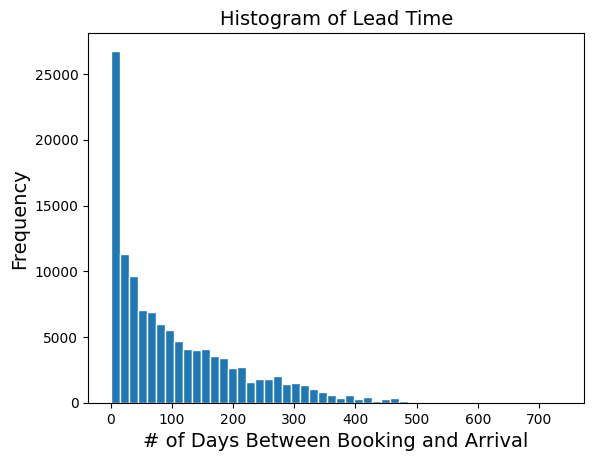

In [ ]:
# Histogram of lead_time
plt.hist(orchard['lead_time'], bins=50, edgecolor='white')

plt.xlabel('# of Days Between Booking and Arrival')
plt.ylabel('Frequency')
plt.title('Histogram of Lead Time')

plt.show()

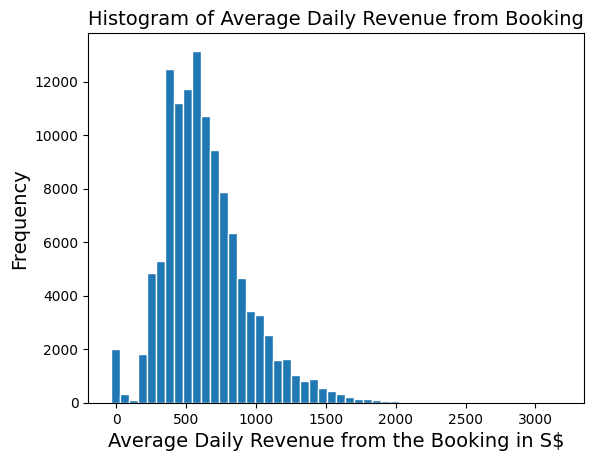

In [ ]:
# Histogram of av_daily_rev
plt.hist(orchard['av_daily_rev'][orchard['av_daily_rev'] < 3500],
         bins=50, edgecolor='white') # Capped at 3500

plt.xlabel('Average Daily Revenue from the Booking in S$')
plt.ylabel('Frequency')
plt.title('Histogram of Average Daily Revenue from Booking')

plt.show()

日均收入有<0的，还有>3w的，可能是outliers

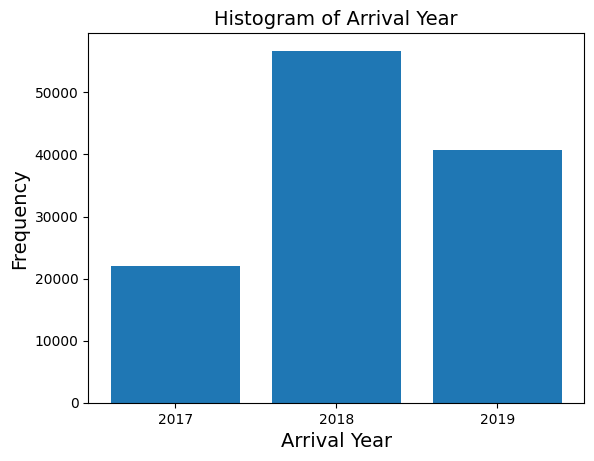

In [ ]:
# Calculate the frequency for each year
value_counts = orchard['arrival_date_year'].value_counts()

# Histogram of arrival_date_year
plt.bar(value_counts.index, value_counts.values)

plt.xticks([2017, 2018, 2019])
plt.xlabel('Arrival Year')
plt.ylabel('Frequency')
plt.title('Histogram of Arrival Year')

plt.show()

2018年访客激增，2019年又有所下降

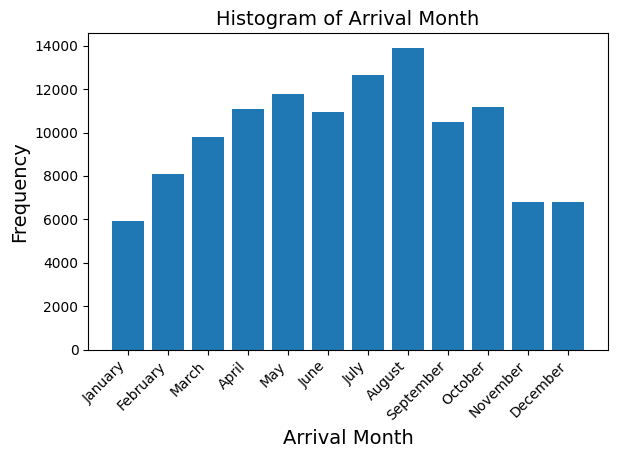

In [ ]:
# Calculate the frequency for each month
month_counts = orchard['arrival_date_month'].value_counts().sort_index()

# Create a new sequential index
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorted_month_counts = month_counts.reindex(month_labels) # Reindex

# Histogram of arrival_date_month
plt.bar(range(1, 13), sorted_month_counts)

plt.xlabel('Arrival Month')
plt.ylabel('Frequency')
plt.title('Histogram of Arrival Month')

plt.xticks(range(1, 13), month_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

arrival_date_week_number所显示的大致趋势与月份相同，arrival_date_day_of_month则较均匀没有明显趋势。此处没有单独作图，后面可以考虑结合生成新变量“一年中的抵达日”来看。

* 周末/工作日夜晚的数量、成人/儿童/婴儿的人数、以前取消/未取消的次数、更改次数、要求接机次数，这些变量的直方图很相似，都是小值多大值少、有离群值，即tail-heavy。下面给出一例，如果想分析可以修改并查看其他变量，若认为不必分析则可删除此部分。

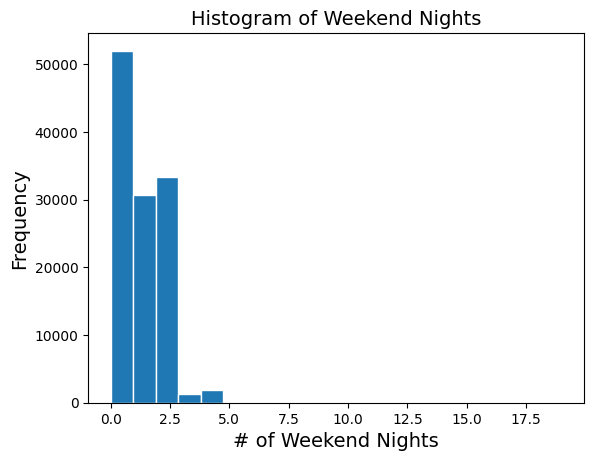

In [ ]:
# Histogram of stays_in_weekend_nights
plt.hist(orchard['stays_in_weekend_nights'], bins=20, edgecolor='white')

plt.xlabel('# of Weekend Nights')
plt.ylabel('Frequency')
plt.title('Histogram of Weekend Nights')

plt.show()

* 对于这些重尾分布的数值型变量，后面在特征工程中取对数,这是因为大多数机器学习模型不能很好地处理非正态分布的数据。重尾分布是指具有比正态分布更厚的尾部的分布，这意味着极端值（较大或较小的值）出现的可能性更大。尾部的厚度取决于离群值的相对频率和离群值与主要分布之间的差异。如果离群值的频率较低且离群值与主要分布之间存在较大差异，则可以认为这个分布具有重尾特征。如上面的('lead_time', 'av_daily_rev', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_cancelled', 'booking_changes', 'require_pickup')都是重尾/长尾分布

* PPT中写到： If distribution of an attribute (to be used in ML training later) is tail-heavy, it may allow small number of large value upset the analysis – take log of the attribute.

Repeat booking and cancellation by hotel:

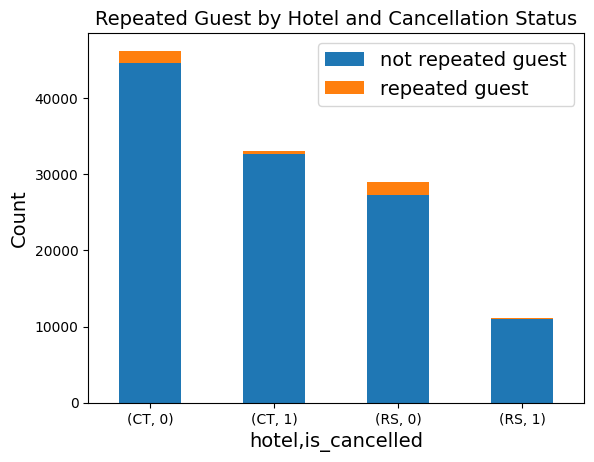

In [ ]:
# Repeated guest account for cancelled and uncancelled guest
counts_1 = orchard.groupby(['hotel', 'is_cancelled', 'is_repeated_guest']).size().unstack()

# Draw a stacked bar chart
counts_1.plot(kind='bar', stacked=True)

plt.title('Repeated Guest by Hotel and Cancellation Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['not repeated guest', 'repeated guest'])

plt.show()

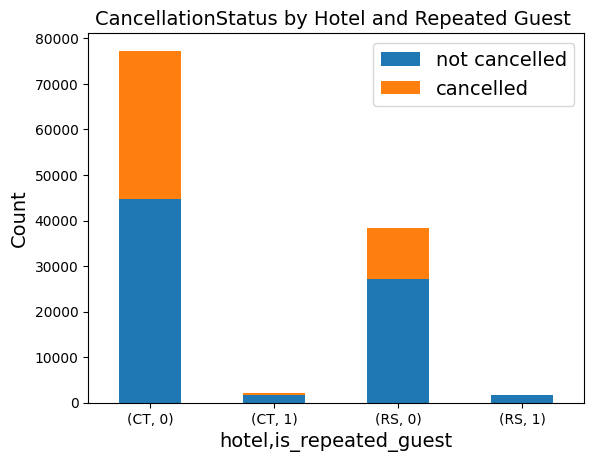

In [ ]:
# Cancelled and uncancelled guest account for repeated guest
counts_2 = orchard.groupby(['hotel', 'is_repeated_guest', 'is_cancelled']).size().unstack()

# Draw a stacked bar chart
counts_2.plot(kind='bar', stacked=True)

plt.title('CancellationStatus by Hotel and Repeated Guest ')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['not cancelled', 'cancelled'])

plt.show()

In [ ]:
percentages = counts_2.div(counts_2.sum(axis=1), axis=0) * 100

print(percentages)

is_cancelled                     0          1
hotel is_repeated_guest                      
CT    0                  57.746643  42.253357
      1                  78.297244  21.702756
RS    0                  71.237135  28.762865
      1                  93.757030   6.242970


CT预定数比RS多，应该是因为商务酒店和度假酒店位置和价格的区别。对这两家酒店，重复预定的客人取消的概率都比较小。CT重复预定的客人中，有78.3%的人未取消，21.7%的人取消了预定,而未重复预定的客人中有42.3%的人取消了预定。RS重复预定的客人中，有93.8%的人未取消，只有6.2%的人取消，而未重复预定的客人中有28.8%的人取消。

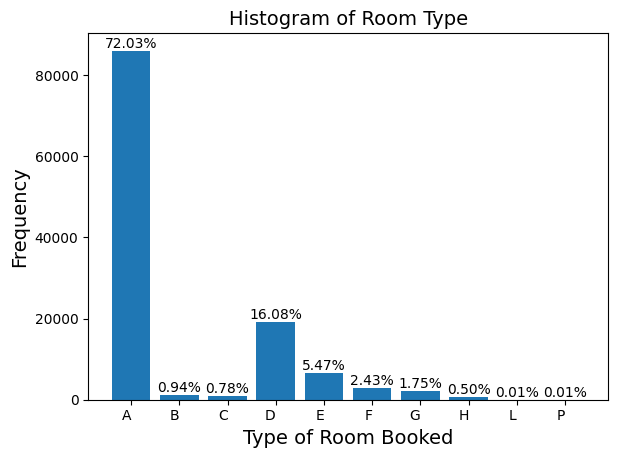

In [ ]:
# Calculate the frequency for each type of room
room_counts = orchard['room_type'].value_counts().sort_index()

# Create a new sequential index
room_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']
sorted_room_counts = room_counts.reindex(room_labels) # Reindex

# Calculate the percentage for each room type
room_percentages = sorted_room_counts / sorted_room_counts.sum() * 100

# Plot histogram of room_type
fig, ax = plt.subplots()
ax.bar(range(1, 11), sorted_room_counts)

# Add the percentage label
for i, v in enumerate(sorted_room_counts):
    ax.text(i + 1, v + 1, f'{room_percentages[i]:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Histogram of Room Type')
plt.xlabel('Type of Room Booked')
plt.ylabel('Frequency')

plt.xticks(range(1, 11), room_labels, ha='right')

plt.tight_layout()
plt.show()

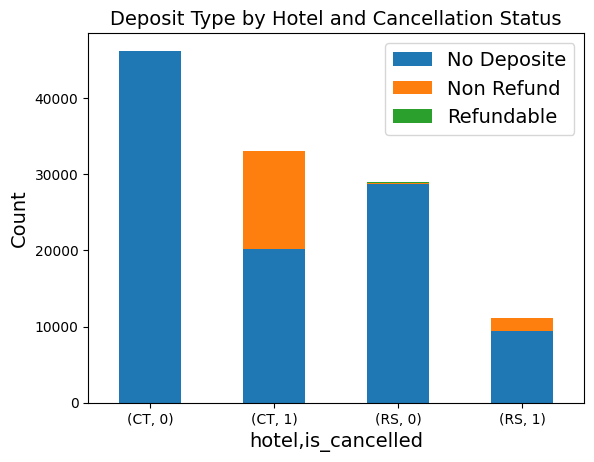

In [ ]:
# Repeated guest account for cancelled and uncancelled guest
counts_3 = orchard.groupby(['hotel', 'is_cancelled', 'deposit_type']).size().unstack()

# Draw a stacked bar chart
counts_3.plot(kind='bar', stacked=True)

plt.title('Deposit Type by Hotel and Cancellation Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['No Deposite', 'Non Refund', 'Refundable'])

plt.show()

In [ ]:
percentages = counts_3.div(counts_3.sum(axis=1), axis=0) * 100

print(percentages)

deposit_type        No Deposit  Non Refund  Refundable
hotel is_cancelled                                    
CT    0              99.935104    0.051917    0.012979
      1              61.156426   38.801281    0.042294
RS    0              99.346880    0.238441    0.414680
      1              84.966733   14.835461    0.197806


绝大部分未取消的预定都是无订金的，绝大部分不退款的都取消了预定，这是为什么？

# Feature Engineering

## Data Transformation

Class feature transformation:

In [ ]:
# Define a dictionary that maps English months to numbers
month_mapping = {'January': 1,
                 'February': 2,
                 'March': 3,
                 'April': 4,
                 'May': 5,
                 'June': 6,
                 'July': 7,
                 'August': 8,
                 'September': 9,
                 'October': 10,
                 'November': 11,
                 'December': 12}

# Convert "arrival_date_month" into numerical attribute (int64)
orchard['arrival_date_month'] = orchard['arrival_date_month'].map(month_mapping)

print(orchard['arrival_date_month'].dtypes)

int64


Smooth log transformation for heavy-tailed continuous variables:

In [ ]:
variables = ['lead_time', 'av_daily_rev', 'stays_in_weekend_nights', 'stays_in_week_nights',
             'adults', 'children', 'babies', 'previous_cancellations',
             'previous_bookings_not_cancelled', 'booking_changes', 'require_pickup']

for var in variables:
    orchard[var] = np.log1p(orchard[var] + 0.1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


平滑对数转换方法是添加一个小的常数（例如0.1）到原始变量值上，然后再应用对数转换。这样可以确保零值在转换后不会变成负无穷大。这些变量经过对数转换，之后可以不用再标准化?

## Feature Construction

In [ ]:
import datetime

# Create a list of datetime objects
dates = []
for year, month, day in zip(orchard['arrival_date_year'], orchard['arrival_date_month'], orchard['arrival_date_day_of_month']):
    try:
        date = datetime.datetime(year, month, day)
        dates.append(date)
    except ValueError:
        dates.append(None)  # Invalid date, can be handled as needed

# Calculate the day of the year for each valid date
day_in_year = [date.timetuple().tm_yday if date is not None else None for date in dates]

# Add the 'arrival_date_day_in_year' column to the orchard DataFrame
orchard['arrival_date_day_in_year'] = day_in_year

# Display the modified orchard DataFrame
orchard.head()

,is_cancelled,lead_time,av_daily_rev,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_cancelled,room_type,booking_changes,deposit_type,require_pickup,arrival_date_day_in_year
hotel,,,,,,,,,,,,,,,,,,,,
RS,0,5.838022,0.095310,2017,7,27,1,0.09531,0.095310,1.131402,0.09531,0.09531,0,0.09531,0.09531,C,1.410987,No Deposit,0.09531,182.0
RS,0,6.604079,0.095310,2017,7,27,1,0.09531,0.095310,1.131402,0.09531,0.09531,0,0.09531,0.09531,C,1.629241,No Deposit,0.09531,182.0
RS,0,2.091864,6.152945,2017,7,27,1,0.09531,0.741937,0.741937,0.09531,0.09531,0,0.09531,0.09531,A,0.095310,No Deposit,0.09531,182.0
RS,0,2.646175,6.152945,2017,7,27,1,0.09531,0.741937,0.741937,0.09531,0.09531,0,0.09531,0.09531,A,0.095310,No Deposit,0.09531,182.0
RS,0,2.714695,6.420158,2017,7,27,1,0.09531,1.131402,1.131402,0.09531,0.09531,0,0.09531,0.09531,A,0.095310,No Deposit,0.09531,182.0


Find invalid date:

In [ ]:
# Filter out the rows where 'arrival_date_day_in_year' is None
non_date = orchard[orchard['arrival_date_day_in_year'].isnull()]

print(non_date)

       is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
hotel                                                             
RS                1   3.370738      5.846728               2018   
RS                1   4.935193      5.537728               2018   
RS                1   3.716008      5.707442               2018   
RS                0   1.808289      5.642262               2018   
RS                0   0.095310      5.242276               2018   
...             ...        ...           ...                ...   
CT                0   3.222868      5.656341               2018   
CT                0   1.410987      7.043247               2018   
CT                0   1.410987      7.079269               2018   
CT                0   3.873282      6.433101               2018   
CT                0   4.754452      6.463185               2018   

       arrival_date_month  arrival_date_week_number  \
hotel                                                 
RS                

96个无效日期，都是2018.2.29，2018年不是闰年，可能是人为错误，后续考虑删除。

## Data Cleaning

In [ ]:
# Checking missing values
orchard.isnull().sum()

is_cancelled                       0
lead_time                          0
av_daily_rev                       0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           0
babies                             0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_cancelled    0
room_type                          0
booking_changes                    0
deposit_type                       0
require_pickup                     0
arrival_date_day_in_year           0
dtype: int64

这里av_daily_rev出现一个空值是因为log转换前有一个负值，日均收入不应该有负，考虑为异常值，可删除

In [ ]:
# Delete all rows with missing values
orchard = orchard.dropna()

orchard.shape

(119289, 20)

# Coorelations

In [ ]:
other_vars = orchard.drop(columns=['room_type', 'deposit_type'])

corr_matrix = other_vars.corr()
corr_matrix['is_cancelled'].sort_values(ascending=False)

is_cancelled                       1.000000
lead_time                          0.320290
previous_cancellations             0.225893
av_daily_rev                       0.083441
adults                             0.069630
stays_in_week_nights               0.048501
arrival_date_year                  0.016761
arrival_date_month                 0.011097
arrival_date_day_in_year           0.010298
arrival_date_week_number           0.008208
children                           0.002460
stays_in_weekend_nights           -0.004312
arrival_date_day_of_month         -0.006190
babies                            -0.034200
is_repeated_guest                 -0.084707
previous_bookings_not_cancelled   -0.097548
booking_changes                   -0.170781
require_pickup                    -0.197023
Name: is_cancelled, dtype: float64

哪些变量需要着重注意，相关性小于0.01的变量是否要保留？（特征选择）

其他问题：1. 对数转换完的变量是否还需要标准化？2. 有object型变量，相关性矩阵热力图怎么做？

# Prepare the Dataset for Model Training

## Transformation Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = ['arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_day_in_year']
cat_attribs = ['room_type', 'deposit_type']

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

pre_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [ ]:
# orchard_transformed = pre_pipeline.fit_transform(orchard)

## Splitting Training, Testing, and Validation Datasets

# Model Training